# Determining the most effective management strategies through modeling approaches

## Thresholds and the resilience of Caribbean coral reefs
### Mumby et al 2007

Macroalgae ($M$), coral ($C$), and algal turfs ($T$) such that at any given time cover                                  can be explained as $ M + C + T =1 $ and changes in cover over time can be understood as:
$$\frac{dM}{dt} = aMC - \frac{gM}{M+T} + Ɣ MT $$
$$\frac{dC}{dt} = rTC - dC - aMC $$
$$\frac{dT}{dt} = \frac{gM}{M+T} - Ɣ MT - rTC + dC $$

I am not concerned with the $\frac{dT}{dt}$ equation as I am considering Turf 'free space' on the reef and it can be defined as $T=1-C-M$


Where:

$a$ is macroalgal overgrowth of coral recruits

$g$ represents grazing of macroalgae and turfs

$\frac{M}{M+T}$ is the proportion of grazing that affects macroalgae

$Ɣ$ is macroalgal overgrowth of turfs

$r$ represents coral recruitment, which can come from anywhere

$d$ is coral mortality

(and again $a$ is macroalgal overgrowth of coral recruits)

## The effect of fishing on hysteresis in Caribbean coral reefs
### Blackwood et al 2012

Ammended Mumby et al to include Parrotfish ($P$) dynamics. Changes in parrotfish dynamics are modeled as logistic growth with an intrinsic rate of growth $s$ and a time varying carrying capacity such that $β$ is the maximum carrying capacity and $K(C)$ is a nondimensional term that limits the carrying capacity of parrotfish based on the coral cover. In this model  $g(P) = \frac{αP}{β}$, where $α$ is a positive constant. "It is natural to let α = gmax where gmax is the maximum possible grazing intensity and for simplicity it is assumed to equal one."

### Incluion of grazer dynamics in the Mumby model:
$$\frac{dM}{dt} = aMC - \frac{g(P)M}{M+T} + Ɣ MT $$
$$\frac{dC}{dt} = rTC - dC - aMC $$
$$\frac{dP}{dt} = sP(1-\frac{P}{βK(C)})-fP$$

$$\frac{dT}{dt} = \frac{g(P)M}{M+T} - Ɣ MT - rTC + dC $$

Where:

$a$ is macroalgal overgrowth of coral recruits

$g(P)$ represents grazing of macroalgae and turfs as a function

$\frac{M}{M+T}$ is the proportion of grazing that affects macroalgae

$Ɣ$ is macroalgal overgrowth of turfs

$r$ represents coral recruitment, which can come from anywhere

$d$ is coral mortality

(and again $a$ is macroalgal overgrowth of coral recruits)

$s$: Growth rate of parrotfish population (retrieved from FishBase)

$P$: Parrotfish abundance (scaled to carrying capacity)

$β$: Parrotfish maximum carrying capacity

$C$: Coral cover

$f$: fishing effort

### Applications for coral restoration
The model was originally developed for use in areas hit by hurricanes, as these disturbances can reduce coral cover and structural refugia for parrotfish. Complementarily, coral restoration sites are inherently degraded. Because these sites also lack adequate complexity to provide refugia for fishes, I believe I can paramaterize this model for this ecosystem. In their ecosystem with limited structure, Blackwood et al assumed that the carrying capacity of the modeled parrotfish is defined by the amount of coral cover. Thus $K(C) = C$ and:

$$\frac{dP}{dt} = sP(1-\frac{P}{βC})-fP$$ 

Additionally, for the purposes of this modeling excercise, I am scaling the Parrotfish output to its relative carrying capacity. Thus, if we assume $P̃ =\frac{P}{β}$, then $g(P) = P̃$ and:

$$\frac{dP}{dt} = sP(1-\frac{P̃}{C})-fP$$ 

For now, I have set $f$ constant where $f\geq 0$

The simplest way to capture increases in grazing in response to increases in abundance is to use the function $g(P) = \frac{αP}{β}$, where $α$ is a positive constant.


Gorospe et al 2018 suggests this region's herbivorous fishes could recover 1764% of biomass and be ecologically functioning. This number is called the percent recovery potential, and is defined as the proportional increase from present-day to baseline biomass. 

### My expansion on this model
I wanted to separate urchins and parrotfish so that the function becomes a herbivore (H) function so that $H = P + U$. Note this assumes that both urchins and parrotfish equally graze on macroalgae and turfs. Thus, my model has become:
$$\frac{dM}{dt} = aMC - \frac{g(H)M}{M+T} + Ɣ MT $$
$$\frac{dC}{dt} = rTC - dC - aMC $$
$$\frac{dH}{dt} = sP(1-\frac{P}{C})-fP $$
$$\frac{dU}{dt} = qU(1-\frac{U}{C})-mU$$


Where:

$s$: Growth rate of parrotfish population (retrieved from FishBase)

$H$: Total Herbivores (Urchins and Parrotfish)

$P$: Parrotfish abundance (scaled to carrying capacity)

$C$: Coral cover

$f$: fishing effort

$q$: Growth rate of urchin population (from farmed urchin outplants)

$U$: Urchin abundance (scaled to carrying capacity)

$m$: mortality rate of urchins outplanted

## Steps:
1. Build the model so that the code runs (at all)
2. Find accurate initial conditions for model system (West O‘ahu)
3. Find/test parameters within reasonable values
4. Alter the system based on restriction of fishing (30 X 30 program inclusion)
5. Alter the system based on addition of herbivorous urchins
6. Alter the system based on addition of coral colonies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit
from scipy.integrate import odeint
from scipy.integrate import solve_ivp

In [2]:
#Define a function to calculate the derivative
def Mumby(t, N, r, a, mu, gamma, g):
    C,M = N
    return [r*C*(1-C-M) - a*C*M - mu*C, gamma*M*(1-C-M) + a*C*M - g*M/(1-C)]

r = 0.2 #coral growth
a = 0.2 #algal overgrowth onto coral
mu = 0.1 #coral background mortality
gamma = 0.7 #algal growth rate
g = 0.3 #maximum grazing rate

time_steps = 1000 #no. of time steps
start = 0 
stop = 1000
time_points = np.linspace(start, stop, time_steps+1)

In [3]:
#! Initial conditions
# In this parameter space, you should observe bistability or alternative stables states
# The results of competition will depend on initial conditions
C0 = 0.55
M0 = 0.29

sol = solve_ivp(Mumby, [start,stop], [C0,M0], method='RK45', args=(r,a,mu,gamma,g), dense_output=True)
N = sol.sol(time_points)

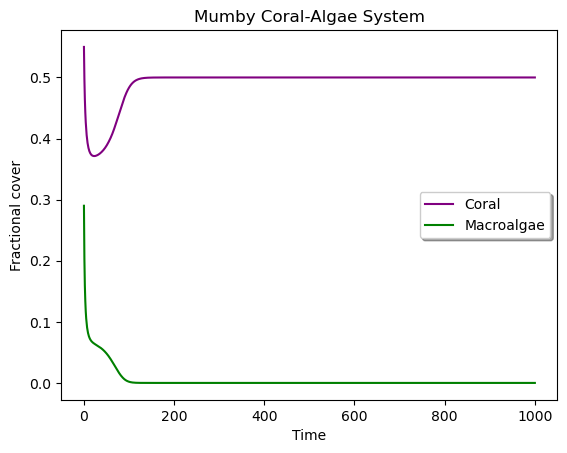

In [4]:
coral = N[0,:]
macroalgae = N[1,:]
plt.plot(time_points, coral, color='purple')
plt.plot(time_points, macroalgae, color='green')
plt.xlabel('Time')
plt.ylabel('Fractional cover')
plt.legend(['Coral', 'Macroalgae'], shadow=True)
plt.title('Mumby Coral-Algae System')
plt.show()

### Incluion of grazer dynamics in the Mumby model:
$$\frac{dM}{dt} = aMC - \frac{g(P)M}{M+T} + Ɣ MT $$
$$\frac{dC}{dt} = rTC - dC - aMC $$
$$\frac{dP}{dt} = sP(1-\frac{P}{βK(C)})-fP$$

$$\frac{dT}{dt} = \frac{g(P)M}{M+T} - Ɣ MT - rTC + dC $$

In [5]:
#Define a function to calculate the derivative. 
#NOTE THIS VERSION HAS A CONSTANT GRAZING RATE
def Blackwood(t, N, r, a, d, gamma, g, s, f):
    C,M,P = N
    return [r*C*(1-C-M) - a*C*M - d*C, 
            gamma*M*(1-C-M) + a*C*M - g*M/(1-C), 
            s*P*(1-P/C)-f*P]

r = 0.2 #coral growth rate
a = 0.2 #algal overgrowth onto coral
d = 0.2 #coral background mortality
gamma = 0.7 #algal growth rate
g = 0.3 #maximum grazing rate
s = 0.1 #fish growth rate
#P = 0.1 #fish abundance as proportion of carrying capacity
f = 0 #fishing pressure


time_steps = 100 #no. of time steps
start = 0 
stop = 100
time_points = np.linspace(start, stop, time_steps+1)

#! Initial conditions
# In this parameter space, you should observe bistability or alternative stables states
# The results of competition will depend on initial conditions
C0 = 0.6
M0 = 0.2
P0 = 0.2

sol = solve_ivp(Blackwood,[start,stop], [C0,M0,P0], method='RK45', args=(r, a, d, gamma, g, s, f), dense_output=True)
N = sol.sol(time_points)

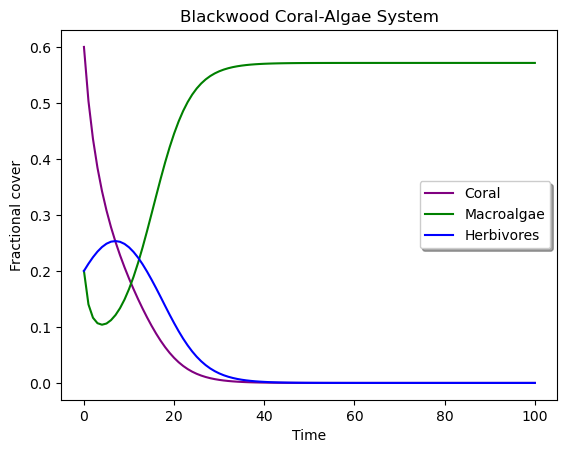

In [6]:
coral = N[0,:]
macroalgae = N[1,:]
herbivores = N[2,:]
plt.plot(time_points, coral, color='purple')
plt.plot(time_points, macroalgae, color='green')
plt.plot(time_points, herbivores, color='blue')
plt.xlabel('Time')
plt.ylabel('Fractional cover')
plt.legend(['Coral', 'Macroalgae','Herbivores'], shadow=True)
plt.title('Blackwood Coral-Algae System')
plt.show()

In [200]:
#Define a function to calculate the derivative
def Blackwood2(t, N, r, a, d, gamma, s, f):
    C,M,P = N
    return [r*C*(1-C-M) - a*C*M - d*C, 
            gamma*M*(1-C-M) + a*C*M - P*M/(1-C), 
            s*P*(1-P/C)-f*P]

r = 1 #coral growth rate
a = 0.1 #algal overgrowth onto coral
d = 0.44 #coral background mortality
gamma = 0.8 #algal growth rate
#g = 0.3 #maximum grazing rate
s = 0.49 #fish growth rate
P = 0.1 #fish abundance as proportion of carrying capacity
f = 0 #fishing pressure


time_steps = 100 #no. of time steps
start = 0 
stop = 100
time_points = np.linspace(start, stop, time_steps+1)

#! Initial conditions
# In this parameter space, you should observe bistability or alternative stables states
# The results of competition will depend on initial conditions
C0 = 0.2
M0 = 0.2
P0 = 0.6

sol = solve_ivp(Blackwood2,[start,stop], [C0,M0,P0], method='RK45', args=(r, a, d, gamma, s, f), dense_output=True)
N = sol.sol(time_points)

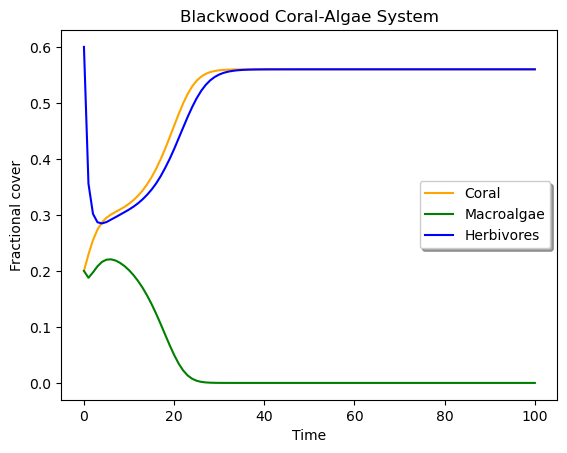

In [201]:
coral = N[0,:]
macroalgae = N[1,:]
herbivores = N[2,:]
plt.plot(time_points, coral, color='orange')
plt.plot(time_points, macroalgae, color='green')
plt.plot(time_points, herbivores, color='blue')
plt.xlabel('Time')
plt.ylabel('Fractional cover')
plt.legend(['Coral', 'Macroalgae','Herbivores'], shadow=True)
plt.title('Blackwood Coral-Algae System')
plt.show()

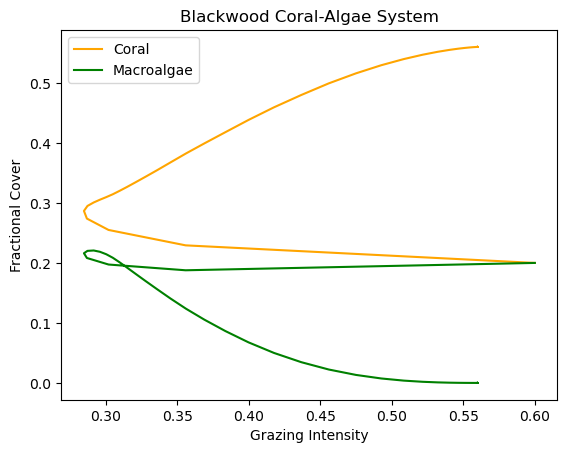

In [202]:
coral = N[0,:]
macroalgae = N[1,:]
herbivores = N[2,:]
plt.plot(herbivores, coral, color='orange')
plt.plot(herbivores, macroalgae, color='green')
plt.xlabel('Grazing Intensity')
plt.ylabel('Fractional Cover')
plt.legend(['Coral', 'Macroalgae'])
plt.title('Blackwood Coral-Algae System')
plt.show()

### My expansion on this model
I wanted to separate urchins and parrotfish so that the function becomes a herbivore (H) function so that $H = P + U$. Note this assumes that both urchins and parrotfish equally graze on macroalgae and turfs. Thus, my model has become:
$$\frac{dM}{dt} = aMC - \frac{g(P+U)M}{M+T} + Ɣ MT $$
$$\frac{dC}{dt} = rTC - dC - aMC $$
$$\frac{dP}{dt} = sP(1-\frac{P}{C})-fP $$
$$\frac{dU}{dt} = qU(1-\frac{U}{C})-mU$$

In [145]:
#Define a function to calculate the derivative
def Stephenson(t, Z, r, a, d, gamma, s, f, q, m):
    C,M,P,U = Z
    return [r*C*(1-C-M) - a*C*M - d*C, 
            gamma*M*(1-C-M) + a*C*M - (P+U)*M/(1-C), 
            s*P*(1-P/C)-f*P, 
            q*U*(1-U/C)-m*U]

r = 0.2 #coral growth rate
a = 0.2 #algal overgrowth onto coral
d = 0.1 #coral background mortality
gamma = 0.7 #algal growth rate
#g = 0.3 #maximum grazing rate. I need to work to replace this with P
s = 0.1 #fish growth rate
#P = 0.1 #fish abundance as proportion of carrying capacity
f = 0.005 #fishing pressure
q = 0.6 #urchin growth rate
#U = 0.1 #urchin abundance as a proportion of carrying capacity
m = 0.1 #urchin mortality rate

time_steps = 100 #no. of time steps
start = 0 
stop = 100
time_points = np.linspace(start, stop, time_steps+1)

In [156]:
C0 = 0.45
M0 = 0.49
P0 = 0.15
U0 = 0.1

sol = solve_ivp(Stephenson, [start,stop], [C0,M0,P0,U0], method='RK45', args=(r, a, d, gamma, s, f, q, m), dense_output=True)
Z = sol.sol(time_points)

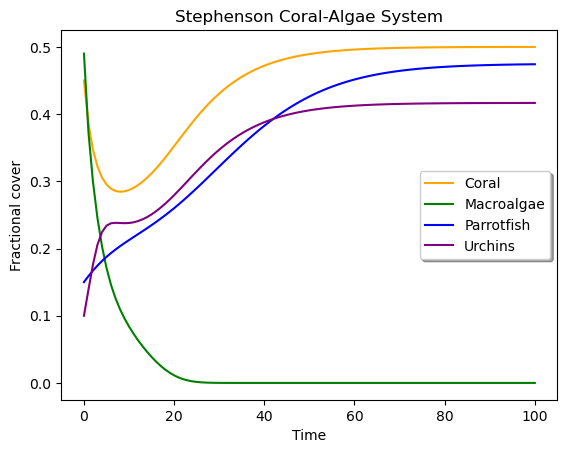

In [157]:
coral = Z[0,:]
macroalgae = Z[1,:]
parrotfish = Z[2,:]
urchins = Z[3,:]
plt.plot(time_points, coral, color='orange')
plt.plot(time_points, macroalgae, color='green')
plt.plot(time_points, parrotfish, color='blue')
plt.plot(time_points, urchins, color='purple')
plt.xlabel('Time')
plt.ylabel('Fractional cover')
plt.legend(['Coral', 'Macroalgae','Parrotfish','Urchins'], shadow=True)
plt.title('Stephenson Coral-Algae System')
plt.show()

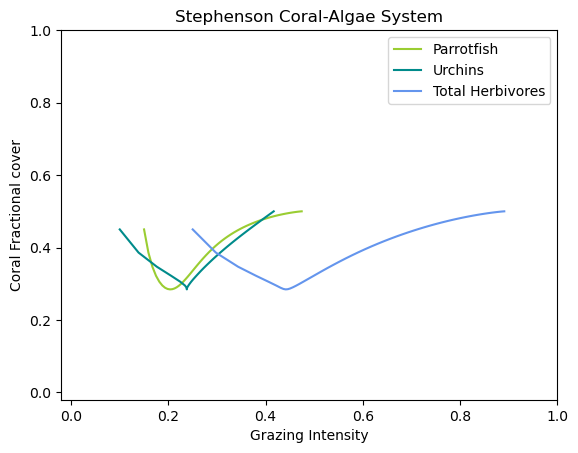

In [175]:
coral = Z[0,:]
macroalgae = Z[1,:]
parrotfish = Z[2,:]
urchins = Z[3,:]
herbivores = parrotfish + urchins
plt.plot(parrotfish, coral, color='yellowgreen')
plt.plot(urchins, coral, color='darkcyan')
plt.plot(herbivores, coral, color='cornflowerblue')
plt.xlabel('Grazing Intensity')
plt.ylabel('Coral Fractional cover')
plt.legend(['Parrotfish', 'Urchins','Total Herbivores'])
plt.title('Stephenson Coral-Algae System')
plt.xlim([-0.02,1])
plt.ylim([-0.02,1])
plt.show()

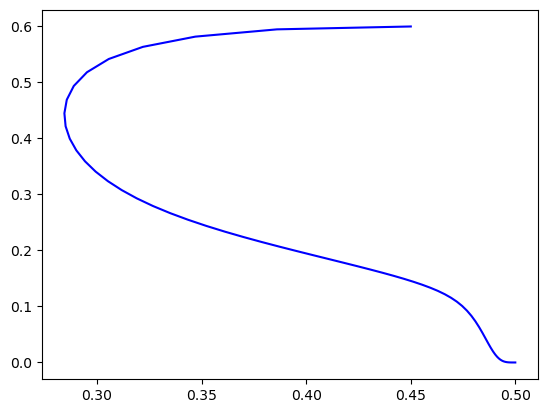

In [159]:
herbivores = N[2,:]
plt.plot(coral, herbivores, color='blue')

# creating a DIY numerical solver

### Model
$$M+T+C=1, H = P + U$$. 
$$\frac{dM}{dt} = aMC - \frac{g(H)M}{M+T} + Ɣ MT $$
$$\frac{dC}{dt} = rTC - dC - aMC $$
$$\frac{dP}{dt} = sP(1-\frac{P}{C})-fP $$
$$\frac{dU}{dt} = qU(1-\frac{U}{C})-mU$$

In [122]:
r = 0.3 #coral growth
a = 0.25 #algal overgrowth onto coral
d = 0.1 #coral background mortality
gamma = 0.7 #algal growth rate
g = 0.3 #maximum grazing rate
s = 0.1
P = 0.1
f = 0.0
q = 0.1
U = 0.1
m = 0.1

time_steps = 1000 #no. of time steps
start = 0 
stop = 1000
time_points = np.linspace(start, stop, time_steps+1)

In [123]:
def dNdt(C,M,P,U,Dict):
    
    dt = Dict['dt']
    NUMYEARS = Dict['NUMYEARS']
    r = Dict['r']
    a = Dict['a']
    d = Dict['d'] #i changed mu to d, not sure why
    gamma = Dict['gamma']
    g = Dict['g']
    s = Dict['s']
    f = Dict['f']
    q = Dict['q']
    m = Dict['m']
    
    #! Calculate the derivative
    dC = r*(1-C-M)*C - d*C - a*M*C #Coral equation
    dM = gamma*M*(1-C-M) + a*C*M - (P+U)*M/(1-C) #Macroalgae equation
    dP = s*P*(1-P/C)-f*P #Parrot equation
    dU = q*U*(1-U/C)-m*U #Urchin equation

    return dC, dM, dP, dU

In [124]:
def RK2(C,M,P,U,Dict): #2nd-order Runge-Kutta
    
    C_init = C
    M_init = M
    P_init = P
    U_init = U
    
    dC1, dM1, dP1, dU1 = dNdt(C,M,P,U,Dict)
    
    C1 = C + 0.5*dC1
    M1 = M + 0.5*dM1
    P1 = P + 0.5*dP1
    U1 = U + 0.5*dU1
    
    dC2, dM2, dP2, dU2 = dNdt(C1,M1,P1,U1,Dict)
    
    dCave = (dC1 + dC2)/2
    dMave = (dM1 + dM2)/2
    dPave = (dP1 + dP2)/2
    dUave = (dU1 + dU2)/2
    
    C = C_init + dCave
    M = M_init + dMave
    P = P_init + dPave
    U = U_init + dUave
    
    return C, M, P, U

In [125]:
def run_model(INIT_C,INIT_M,INIT_P, INIT_U, Dict):
   
    NUMYEARS = Dict['NUMYEARS']
    
    C = np.zeros((NUMYEARS+1))
    M = np.zeros((NUMYEARS+1))
    P = np.zeros((NUMYEARS+1))
    U = np.zeros((NUMYEARS+1))
    
    C[0] = INIT_C
    M[0] = INIT_M
    P[0] = INIT_P
    U[0] = INIT_U
    
    for year in np.arange(0,NUMYEARS):
        C[year+1],M[year+1],P[year+1],U[year+1] = RK2(C[year],M[year],P[year],U[year],Dict)
    
    return C, M, P, U

In [126]:
# Create a dictionary object called 'parameters_dict'
dt = 1
NUMYEARS = 200
parameters_dict = {'dt':dt,
                    'NUMYEARS': NUMYEARS, 
                    'r': r, 
                    'a': a,
                    'd': d,
                    'gamma': gamma,
                    'g': g,
                    's': s,
                    'P': P,
                    'f': f,
                    'q': q,
                    'U': U,
                    'm': m
                    }

# set initial conditions for C0, M0, P0,U0!
C0 = 0.8
M0 = 0.2
P0 = 0.1
U0 = 0.1

# Generate output
C_array, M_array, P_array, U_array = run_model(C0,M0,P0,U0,parameters_dict)

Text(0.5, 1.0, 'Coral reef community dynamics')

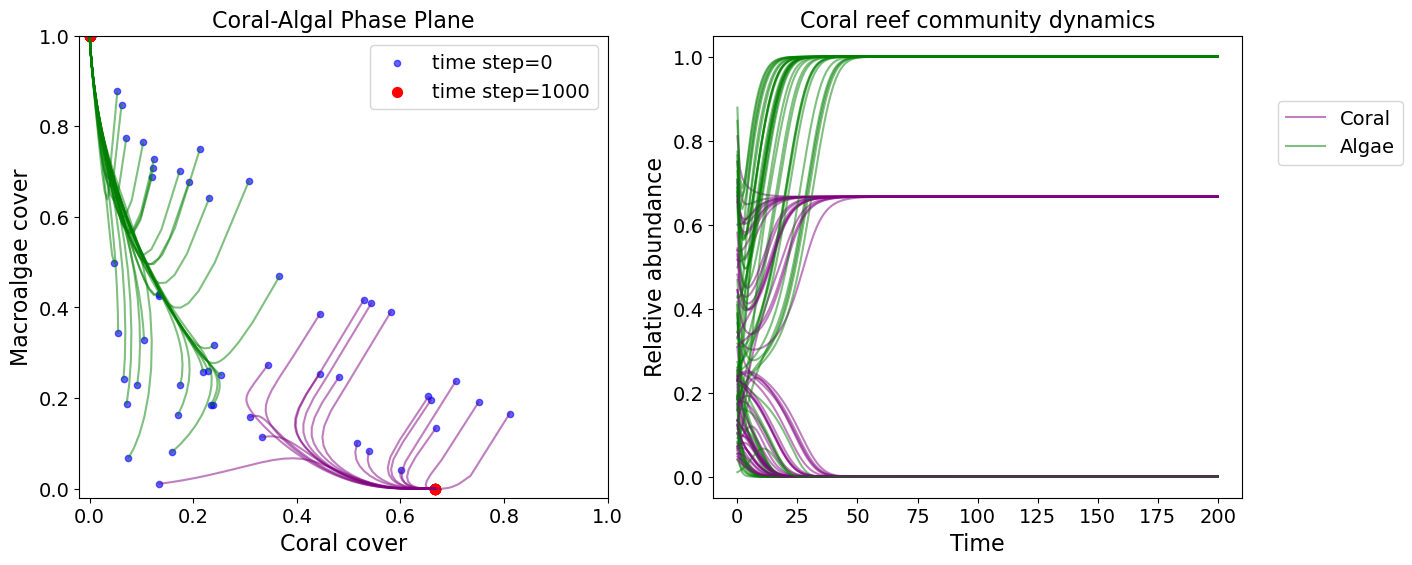

In [127]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))

for i in np.arange(0,100):
    C0 = np.random.random()
    M0 = np.random.random()
    P0 = 0.15
    U0 = 0.15
    # only use initial conditions that make sense, i.e. Initial Coral + Macroalgae must be less than 1
    if (C0 + M0 <= 1) : 
        C_array, M_array, P_array, U_array = run_model(C0,M0,P0,U0,parameters_dict)
        if (C_array[-1] > M_array[-1]): # if final coral value > final macroalgae value
            color = 'purple'
        else:
            color='green'
        ax1.plot(C_array, M_array, color=color, alpha=0.5) # plot the trajectory in the phase plane (plot A)
        item1 = ax1.scatter(C_array[0], M_array[0], color='blue', s=20, alpha=0.6) # plot the starting point in blue
        item2 = ax1.scatter(C_array[-1], M_array[-1], color='red', s=50) # plot the final point in red
        ax2.plot(C_array, c='purple', alpha=0.5) # plot the coral time series in plot B
        ax2.plot(M_array, c='green', alpha=0.5) # plot the macroalgae time series in plot B

ax1.legend([item1, item2], ['time step=0', 'time step=1000'], fontsize=14)
ax1.set_xlabel("Coral cover", fontsize=16);
ax1.set_ylabel("Macroalgae cover", fontsize=16);
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_title('Coral-Algal Phase Plane', fontsize=16)
ax1.set_xlim([-0.02,1])
ax1.set_ylim([-0.02,1])

ax2.legend(['Coral', 'Algae'], loc='lower left', bbox_to_anchor=(1.05, 0.7), fontsize=14)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xlabel("Time", fontsize=16);
ax2.set_ylabel("Relative abundance", fontsize=16);
ax2.set_title('Coral reef community dynamics', fontsize=16)

Text(0.5, 1.0, 'Coral reef community dynamics')

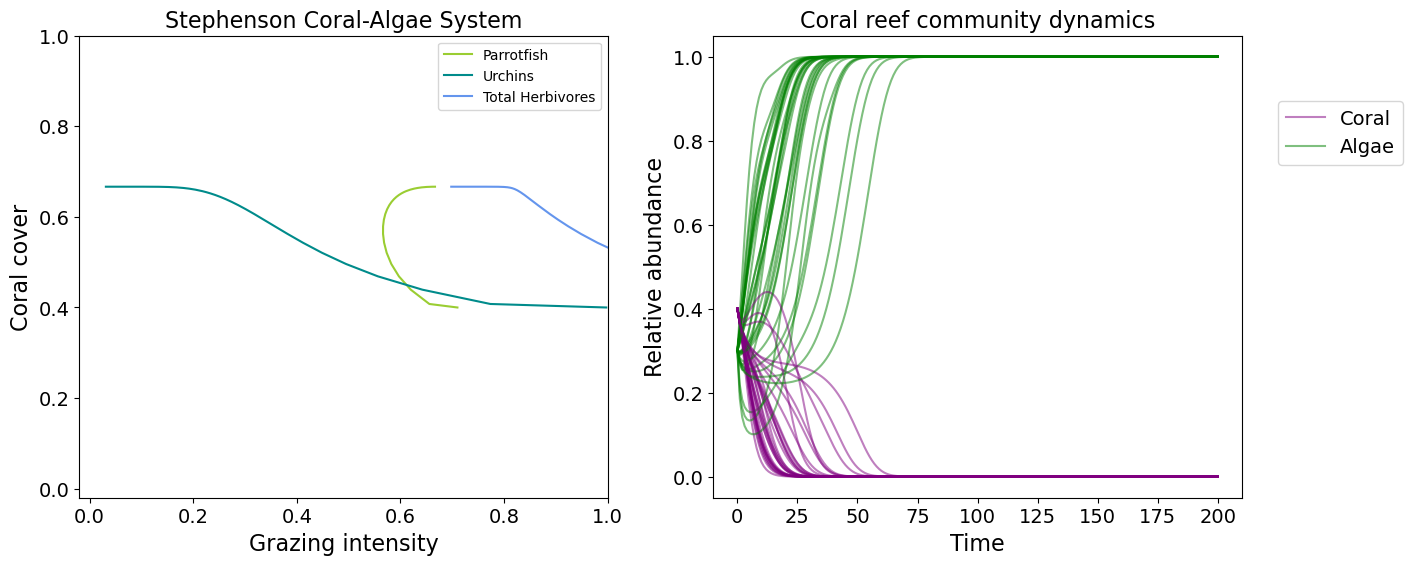

In [189]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,6))

for i in np.arange(0,1000):
    C0 = 0.4
    M0 = 0.3
    P0 = np.random.random()
    U0 = np.random.random()
    # only use initial conditions that make sense, i.e. Initial Coral + Macroalgae must be less than 1
    #if (C0 + M0 <= 1) : 
    C_array, M_array, P_array, U_array = run_model(C0,M0,P0,U0,parameters_dict)
    if (C_array[-1] > M_array[-1]): # if final coral value > final macroalgae value
        color = 'purple'
    else:
        color='green'
        #ax1.plot(C_array, M_array, color=color, alpha=0.5) # plot the trajectory in the phase plane (plot A)
        #item1 = ax1.scatter(C_array[0], M_array[0], color='blue', s=20, alpha=0.6) # plot the starting point in blue
        #item2 = ax1.scatter(C_array[-1], M_array[-1], color='red', s=50) # plot the final point in red
        ax2.plot(C_array, c='purple', alpha=0.5) # plot the coral time series in plot B
        ax2.plot(M_array, c='green', alpha=0.5) # plot the macroalgae time series in plot B

coral = C_array
macroalgae = M_array
parrotfish = P_array
urchins = U_array
herbivores = parrotfish + urchins
ax1.plot(parrotfish, coral, color='yellowgreen')
ax1.plot(urchins, coral, color='darkcyan')
ax1.plot(herbivores, coral, color='cornflowerblue')
plt.xlabel('Grazing Intensity')
plt.ylabel('Coral Fractional cover')
ax1.legend(['Parrotfish', 'Urchins','Total Herbivores'])
ax1.set_xlabel("Grazing intensity", fontsize=16);
ax1.set_ylabel("Coral cover", fontsize=16);
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=14)
ax1.set_title('Stephenson Coral-Algae System', fontsize=16)
ax1.set_xlim([-0.02,1])
ax1.set_ylim([-0.02,1])

ax2.legend(['Coral', 'Algae'], loc='lower left', bbox_to_anchor=(1.05, 0.7), fontsize=14)
ax2.tick_params(axis='x', labelsize=14)
ax2.tick_params(axis='y', labelsize=14)
ax2.set_xlabel("Time", fontsize=16);
ax2.set_ylabel("Relative abundance", fontsize=16);
ax2.set_title('Coral reef community dynamics', fontsize=16)

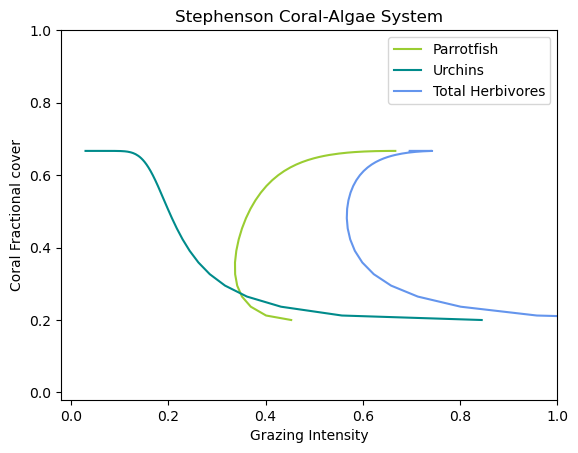

In [179]:
coral = C_array
macroalgae = M_array
parrotfish = P_array
urchins = U_array
herbivores = parrotfish + urchins
plt.plot(parrotfish, coral, color='yellowgreen')
plt.plot(urchins, coral, color='darkcyan')
plt.plot(herbivores, coral, color='cornflowerblue')
plt.xlabel('Grazing Intensity')
plt.ylabel('Coral Fractional cover')
plt.legend(['Parrotfish', 'Urchins','Total Herbivores'])
plt.title('Stephenson Coral-Algae System')
plt.xlim([-0.02,1])
plt.ylim([-0.02,1])
plt.show()